In [2]:
from __future__ import print_function, division

import networkx as nx
from graphviz import Digraph

import torch
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from torch.utils.data import Dataset

from datasets import dynamicDataset

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [86]:
df = dynamicDataset(path="../data/mathOverflow/sx-mathoverflow.txt")

print(df.data.head())

                     from  to    unixTime
timestamp                                
2009-09-29 02:56:28     1   4  1254192988
2009-09-29 03:24:16     3   4  1254194656
2009-09-29 05:36:52     1   2  1254202612
2009-09-29 14:00:04    25   1  1254232804
2009-09-29 22:26:06    14  16  1254263166


In [89]:
# Group by particular time value (year, month ,date)
# Allow for sampling of rows 

# data = df.data.groupby(by=[df.data.index.year, df.data.index.month])
data = df.data.groupby(by=[df.data.index.year])

# for name, group in data:
#     print(name)
#     print(group)

# nrows = 5000
# data = df.data.sample(nrows)
# data = data.groupby(by=[data.index.year])

In [90]:
# Create a list of all the keys within the groupby
keys = list(data.groups.keys())

# Create a list of all the dataframes within the groupby

dfs = []
for key in keys:
    dfs.append(data.get_group(key))
    
assert(len(dfs[0]) + len(dfs[1]) == len(pd.concat([dfs[0], dfs[1]])))

In [91]:
# Cocatenate rows from each timestep

combined = []
combined.append(dfs[0])

for i in range(1, len(dfs)):
    # Segment graph by nodes up to and including that time 
    combined.append(pd.concat([combined[i-1], dfs[i]]))
    
# Validate operation
total = 0
for i in range(len(combined)):
    total += len(dfs[i])
    print(len(combined[i]), ' ', total)

18711   18711
124985   124985
209911   209911
285034   285034
360855   360855
428052   428052
494266   494266
506550   506550


In [92]:
# Recreate adjacency matrix at each time 

adjacencies = []

for i in range(len(combined)):
    adjacency = nx.from_edgelist(combined[i].iloc[:, :2].values, create_using=nx.DiGraph)
    adjacencies.append(nx.to_numpy_matrix(adjacency))

In [99]:
print(adjacencies[0].shape)

(1289, 1289)


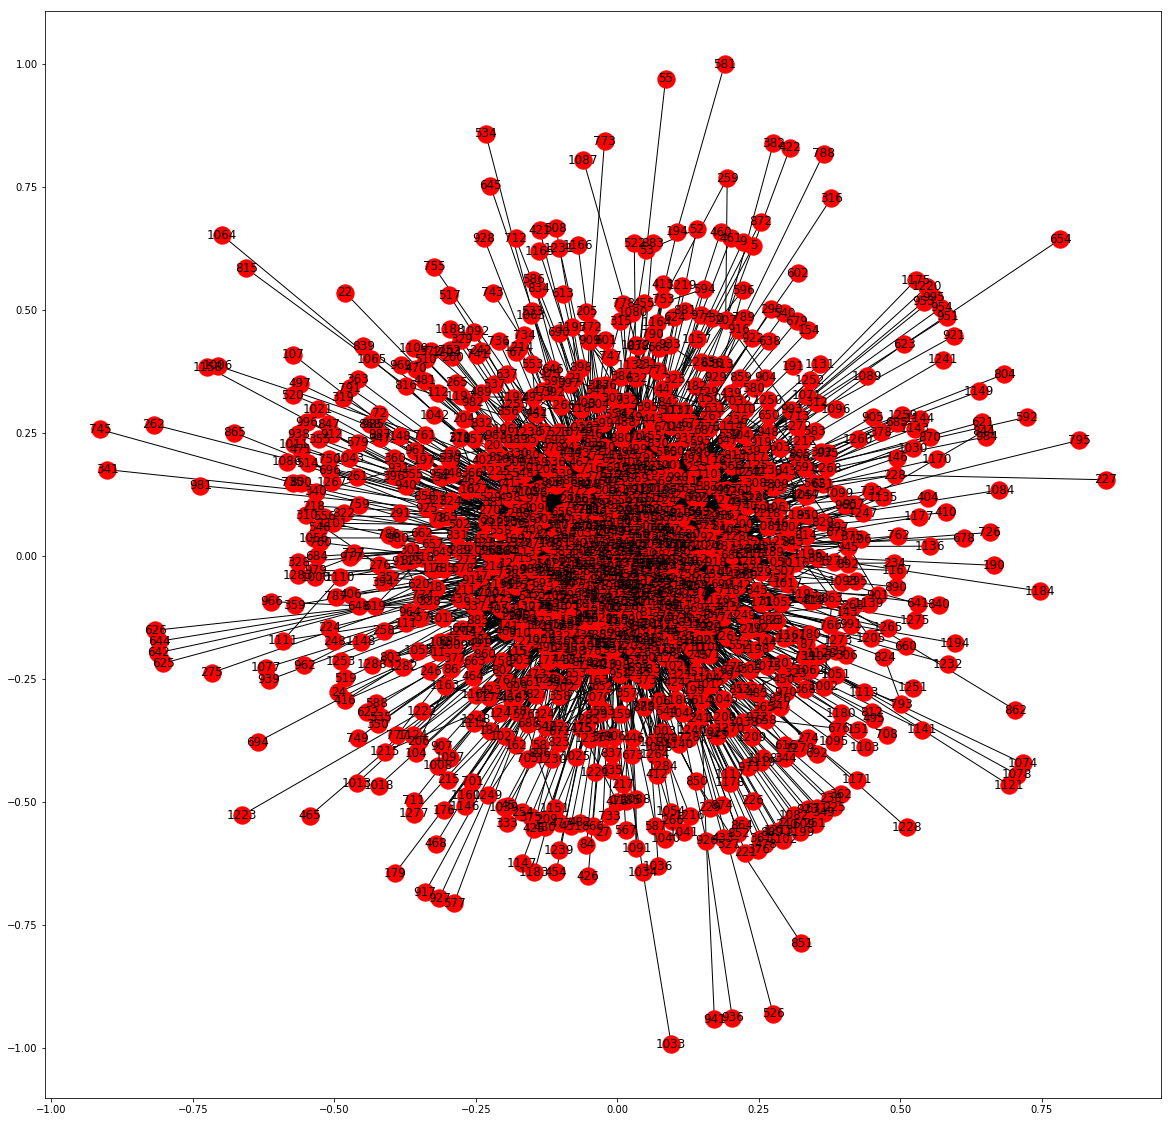

In [101]:
graph1 = nx.from_numpy_matrix(np.vstack(adjacencies[0]))
np.random.seed(0)
plt.figure(figsize=(20, 20))

nx.draw_networkx(graph1)
plt.draw() 